In [1]:
import pandas as pd

In [2]:
td = pd.read_csv('diabetes.csv')

In [3]:
print(td.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [4]:
td.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
td.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [6]:
td.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
td.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [8]:
import seaborn as sns


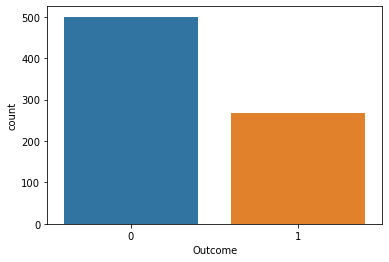

In [9]:
sns.countplot(x = 'Outcome', data = td)

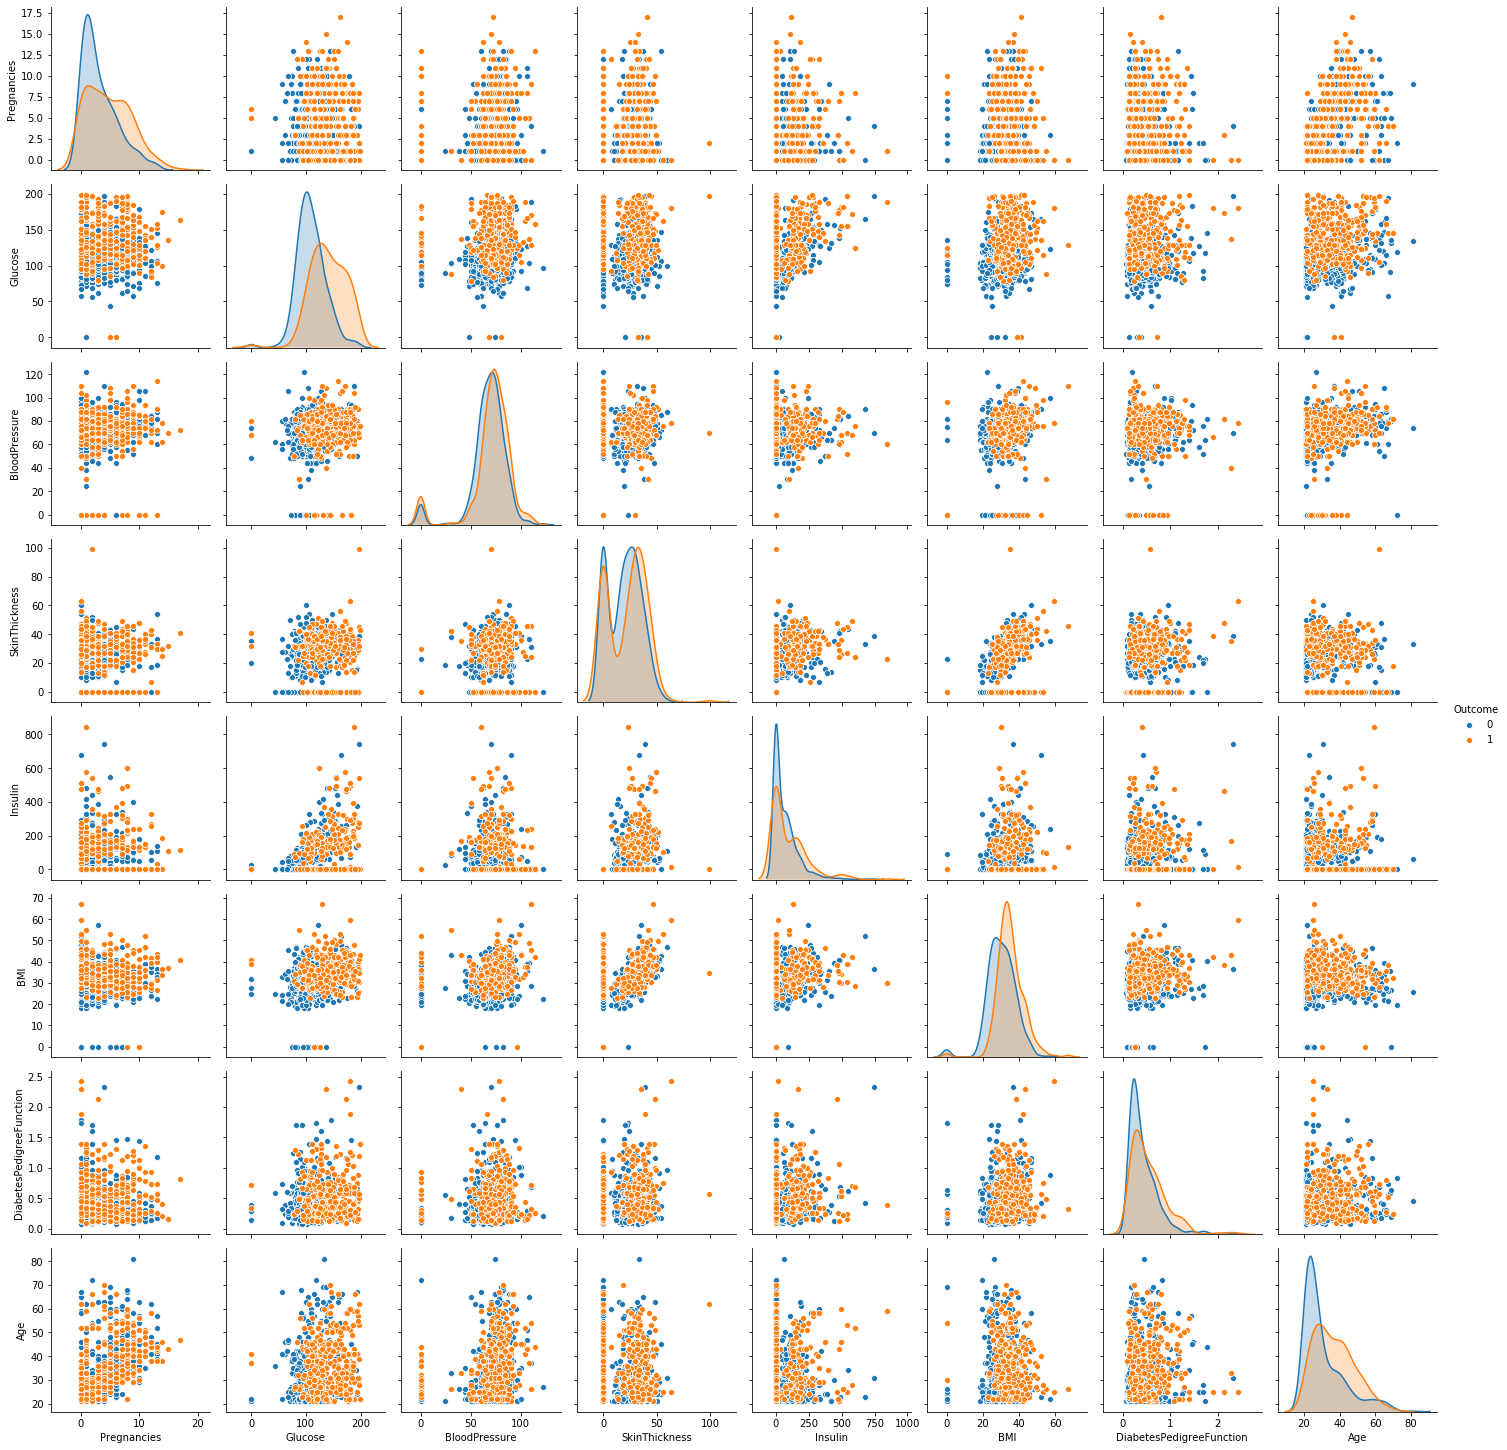

In [10]:
sns.pairplot( td, hue = 'Outcome')

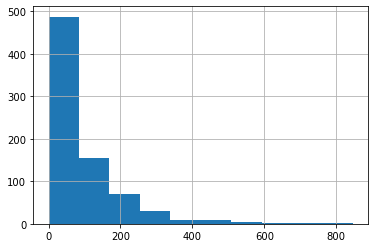

In [11]:
td['Insulin'].hist()

In [12]:
td['Outcome'].max()

1

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [14]:
td.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = td.drop(['Outcome'], axis = 1)
y = td['Outcome']

In [16]:
X_train,X_test,y_train, y_test= train_test_split(X, y ,test_size = 0.20, random_state = 15)

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model1 =DecisionTreeClassifier(criterion = 'gini',splitter = 'random',max_depth = 5 )
model2 = DecisionTreeClassifier()

# Training DecisionTree Classifier 


In [18]:
model1.fit(X_train, y_train)
model.fit(X_train, y_train)
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model.predict(X_test)
y_pred1 = model1.predict(X_test)
y_pred2= model2.predict(X_test)

In [20]:
print(metrics.accuracy_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred1), metrics.accuracy_score(y_test, y_pred2))

0.7402597402597403 0.7402597402597403 0.6818181818181818


In [21]:
feature_cols = X.columns
print(feature_cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [22]:
import graphviz

In [23]:
from sklearn.tree import export_graphviz
import graphviz

data = export_graphviz(model,feature_names=feature_cols,class_names=['0','1'],out_file=None,filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph.render('dtree_render_',view=True) # this line saves image as pdf file on your machine as "dtree_renser.pdf"


'dtree_render_.pdf'

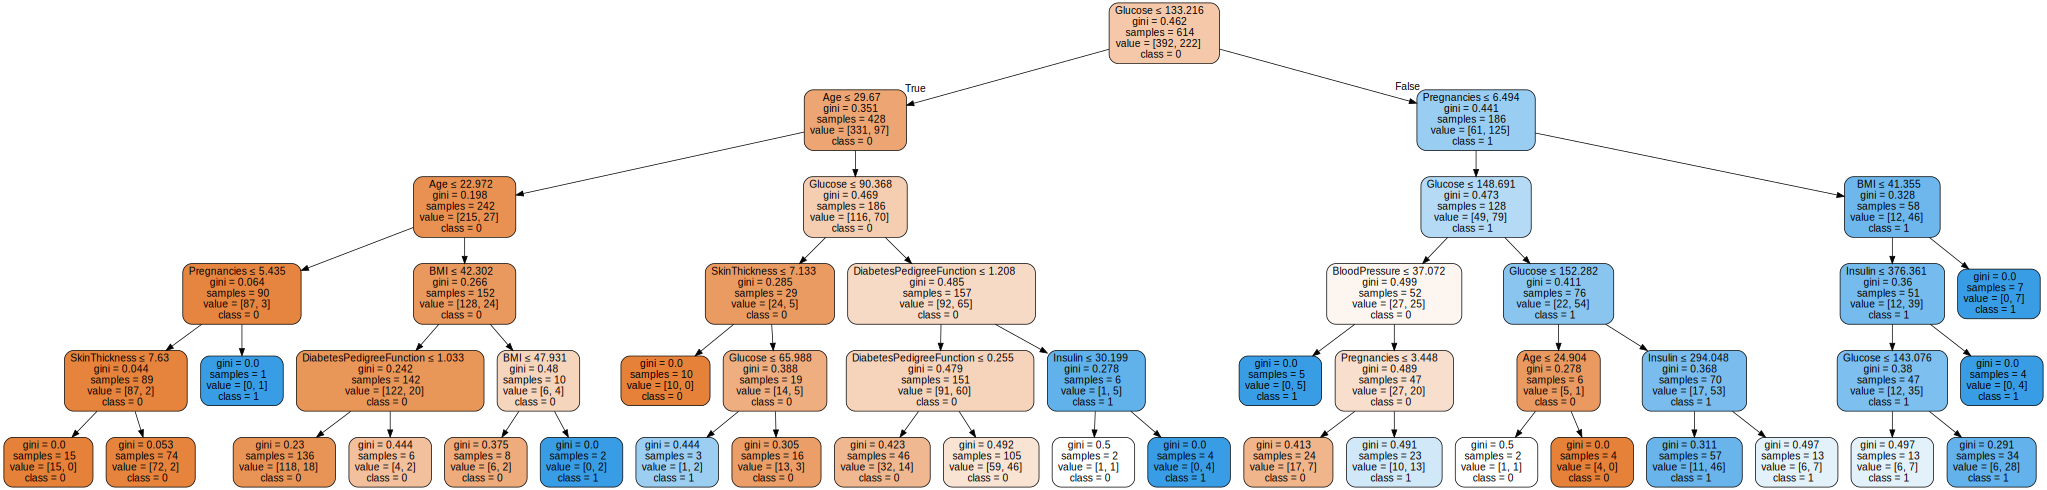

In [24]:
import pydotplus
tree2 = export_graphviz(model1 ,feature_names = feature_cols, class_names = ['0' , '1'],filled =True, rounded = True, special_characters = True)
tree = graphviz.Source(tree2)
tree
